# Final Project Amazon Product Review Classification - Alexa Echo Dot (3rd Gen, 2018 Release)

Importing all required libraries

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word, Blobber
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
header={'User-Agent': 'Chrome/108.0.5359.99','referer':'https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'}


In [ ]:
cookie={}

Here we uilt a function to connect to the Amazon product review page and pull data on that page.

In [ ]:
def Searchreviews(review_link):
    url="https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+review_link
    print(url)
    page=requests.get(url,cookies=cookie,headers=header)
    if page.status_code==200:
        return page
    else:
        return "Error"

We went through 500 review pages for this product from Amazon and got all the 5000 reviews from those 500 pages.

Pulling reviews(comments) of users using below code:

In [ ]:
reviews=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("span",{'data-hook':"review-body"}):
    reviews.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
reviews

['\nThis device is sleek and compact, making it perfect for any room in the house. The sound quality is impressive for its size and the addition of the virtual assistant, Alexa, makes it incredibly easy to use.One of the standout features of the Echo Dot is its ability to control smart home devices. With the simple command of "Alexa, turn off the lights," I can easily control all of my connected devices without even having to get up. This feature alone has been a game changer for me and has made my daily routine much more efficient.Another great feature is the ability to play music from a variety of sources. Whether I want to listen to my favorite playlist on Spotify or catch up on the latest news, the Echo Dot has me covered. The device also integrates seamlessly with other Echo devices, allowing me to fill my entire home with sound.Overall, I highly recommend the Echo Dot (3rd Gen, 2018 release) to anyone looking to add a versatile and convenient smart device to their home. It has ex

In [ ]:
len(reviews)

5000

Pulling review-star-rating of users using below code:

In [ ]:
ratings=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("i",{'data-hook':"review-star-rating"}):
    ratings.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
ratings

In [ ]:
len(ratings)

Pulling review-title of user reviews for the product using below code:

In [ ]:
review_title=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("a",{'data-hook':"review-title"}):
    review_title.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
review_title

['\nUpgrade your home with the versatile and convenient Echo Dot\n',
 '\nMay Stop Working After a While\n',
 '\nAlexa is my best friend.\n',
 '\nNice little unit.\n',
 '\nGreat sound\n',
 "\nThis system has been ruined at Amazon's choice\n",
 "\nA great device for it's price!\n",
 '\nBuen sonido, compacta y bonita | Good sound, compact and pretty\n',
 '\nHappy (and amused) with my unit\n',
 '\nGreat for Seniors\n',
 '\nUpgrade your home with the versatile and convenient Echo Dot\n',
 '\nMay Stop Working After a While\n',
 '\nAlexa is my best friend.\n',
 '\nNice little unit.\n',
 '\nGreat sound\n',
 "\nThis system has been ruined at Amazon's choice\n",
 "\nA great device for it's price!\n",
 '\nBuen sonido, compacta y bonita | Good sound, compact and pretty\n',
 '\nHappy (and amused) with my unit\n',
 '\nGreat for Seniors\n',
 '\nYou can still request a specific album or artist!!\n',
 '\n☆Read This - Before You Buy Any Alexa Device - Seriously ☆\n',
 '\nLove\n',
 '\nDifficulties connec

In [ ]:
len(review_title)

5000

Pulling review-date of users using below code:

In [ ]:
review_date=[]
for k in range(500):
  response=Searchreviews('&pageNumber='+str(k))
  soup=BeautifulSoup(response.content)
  for i in soup.findAll("span",{'data-hook':"review-date"}):
    review_date.append(i.text)

https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=5
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=6
https://www.amazon.com/Echo-Dot/product-reviews/B07FZ8S74R/ref=cm_cr_

In [ ]:
review_date

['Reviewed in the United States 🇺🇸 on December 13, 2022',
 'Reviewed in the United States 🇺🇸 on December 14, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on November 14, 2022',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the United States 🇺🇸 on December 12, 2022',
 'Reviewed in the United States 🇺🇸 on September 3, 2021',
 'Reviewed in the United States 🇺🇸 on December 9, 2022',
 'Reviewed in the United States 🇺🇸 on December 13, 2022',
 'Reviewed in the United States 🇺🇸 on December 14, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the United States 🇺🇸 on December 8, 2022',
 'Reviewed in the United States 🇺🇸 on November 14, 2022',
 'Reviewed in the United States 🇺🇸 on December 4, 2022',
 'Reviewed in the Unite

In [ ]:
len(review_date)

5000

Extracting numeric rating value from review-star-ratings column using below code:

In [ ]:
updated_ratings=[]
for i in ratings:
  updated_ratings.append(int(i[0:1]))

In [ ]:
len(updated_ratings)

5000

Extracting dates value from review-date column using below code:

In [ ]:
updated_dates=[]
for i in review_date:
  updated_dates.append(i[36:])

In [ ]:
updated_dates

['December 13, 2022',
 'December 14, 2022',
 'December 8, 2022',
 'December 4, 2022',
 'December 8, 2022',
 'November 14, 2022',
 'December 4, 2022',
 'December 12, 2022',
 'September 3, 2021',
 'December 9, 2022',
 'December 13, 2022',
 'December 14, 2022',
 'December 8, 2022',
 'December 4, 2022',
 'December 8, 2022',
 'November 14, 2022',
 'December 4, 2022',
 'December 12, 2022',
 'September 3, 2021',
 'December 9, 2022',
 'December 7, 2022',
 'August 4, 2020',
 'December 10, 2022',
 'December 6, 2022',
 'December 21, 2019',
 'December 5, 2022',
 'December 14, 2022',
 'December 5, 2022',
 'December 6, 2022',
 'December 5, 2022',
 'December 3, 2022',
 'December 14, 2022',
 'December 2, 2022',
 'December 5, 2022',
 'December 5, 2022',
 'December 9, 2022',
 'December 12, 2022',
 'December 11, 2022',
 'October 21, 2022',
 'November 13, 2022',
 'December 3, 2022',
 'November 29, 2022',
 'December 8, 2022',
 'December 5, 2022',
 'November 27, 2022',
 'December 5, 2022',
 'October 7, 2022

Building our dataframe using extracted fields

In [ ]:
data = {'Product': 'Alexa - Echo Dot (3rd Gen, 2018 release)',
        'Rating': updated_ratings,
        'Review_Title':review_title,
        'Review':reviews,
        'Review_date':updated_dates}
 
df = pd.DataFrame(data)
df

,Product,Rating,Review_Title,Review,Review_date
0,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nUpgrade your home with the versatile and con...,"\nThis device is sleek and compact, making it ...","December 13, 2022"
1,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,\nMay Stop Working After a While\n,\nOverall I liked the echo dot and I ordered a...,"December 14, 2022"
2,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nAlexa is my best friend.\n,\nI love Alexa! I do not know how I can get al...,"December 8, 2022"
3,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nNice little unit.\n,\nThis was my second echo unit for me. I neede...,"December 4, 2022"
4,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat sound\n,\nI have finally stepped into the 21st Century...,"December 8, 2022"
...,...,...,...,...,...
4995,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nEcho Dot (3ra Gen) - Parlante inteligente co...,"\nMagnifico, buen sonido\n","July 3, 2022"
4996,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nExcellent\n,\nVery resourceful.\n,"July 7, 2022"
4997,"Alexa - Echo Dot (3rd Gen, 2018 release)",3,\nThese are in ever room.\n,\nI dont need to get up to turn on the TV or f...,"June 21, 2022"
4998,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nIf it's your first Echo Dot read this\n,\nThis is the perfect Echo Dot to try on your ...,"July 30, 2020"


In [ ]:
df.shape

(5000, 5)

Creating a new Sentiment column which carries 3 values Positive, Negative and Neutral based on rating. We did that using below code:

In [ ]:
def f(df):
  if df['Rating'] == 3:
    val = 'Neutral'
  elif df['Rating'] == 1 or df['Rating'] == 2:
    val = 'Negative'
  elif df['Rating'] == 4 or df['Rating'] == 5:
    val = 'Positive'
  else:
    val = -1
  return val

In [ ]:
df['Sentiment'] = df.apply(f, axis=1)
df.head()

,Product,Rating,Review_Title,Review,Review_date,Sentiment
0,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nUpgrade your home with the versatile and con...,"\nThis device is sleek and compact, making it ...","December 13, 2022",Positive
1,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,\nMay Stop Working After a While\n,\nOverall I liked the echo dot and I ordered a...,"December 14, 2022",Positive
2,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nAlexa is my best friend.\n,\nI love Alexa! I do not know how I can get al...,"December 8, 2022",Positive
3,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nNice little unit.\n,\nThis was my second echo unit for me. I neede...,"December 4, 2022",Positive
4,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat sound\n,\nI have finally stepped into the 21st Century...,"December 8, 2022",Positive


Further, we identified the value counts for each of the classes in the Sentiment column

In [ ]:
df['Sentiment'].value_counts()

Positive    4780
Neutral      175
Negative      45
Name: Sentiment, dtype: int64

Below function cleans the data by converting it to lowercase, removing punctuations, dirty data and escape characters

In [ ]:
def review_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

We applied the above function on Review column in our created dataset

In [ ]:
df['Review']=df['Review'].apply(lambda x:review_cleaning(x))
df.head()

,Product,Rating,Review_Title,Review,Review_date,Sentiment
0,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nUpgrade your home with the versatile and con...,this device is sleek and compact making it per...,"December 13, 2022",Positive
1,"Alexa - Echo Dot (3rd Gen, 2018 release)",4,\nMay Stop Working After a While\n,overall i liked the echo dot and i ordered ano...,"December 14, 2022",Positive
2,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nAlexa is my best friend.\n,i love alexa i do not know how i can get along...,"December 8, 2022",Positive
3,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nNice little unit.\n,this was my second echo unit for me i needed s...,"December 4, 2022",Positive
4,"Alexa - Echo Dot (3rd Gen, 2018 release)",5,\nGreat sound\n,i have finally stepped into the century my gd...,"December 8, 2022",Positive


Further we removed the stopwords from the Review column

In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df['Review'].head()

0    device sleek compact making perfect room house...
1    overall liked echo dot ordered another one sho...
2    love alexa know get along without reminds need...
3    second echo unit needed something extend range...
4    finally stepped century gdaughers would say iv...
Name: Review, dtype: object

Here, we perform stemming on the Review column

In [ ]:
ps = PorterStemmer()
review_features=df.copy()
review_features=review_features[['Review']].reset_index(drop=True)
review_features.head()

corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['Review'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

Further, lemmatization is performed on the Review column

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(w).lemmatize() for w in x.split()]))
df['Review'].head()

0    device sleek compact making perfect room house...
1    overall liked echo dot ordered another one sho...
2    love alexa know get along without reminds need...
3    second echo unit needed something extend range...
4    finally stepped century gdaughers would say iv...
Name: Review, dtype: object

After performing all the above steps on the Review column, we applied TfidfVectorizer on that column and we took that as our X column

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf_vectorizer.fit_transform(review_features['Review'])

In [ ]:
X.shape

(5000, 5000)

The Sentiment column was further taken in y

In [ ]:
y = df['Sentiment']

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Here, we split the data into training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

Further we trained our Bernoulli Naive Bayes model using training data

In [ ]:
nb_cv = BernoulliNB()
nb_cv.fit(X_train, y_train)

BernoulliNB()

We tested our model using testing data and stored our results in y_pred

In [ ]:
y_pred = nb_cv.predict(X_test)
y_pred

array(['Positive', 'Negative', 'Positive', ..., 'Neutral', 'Negative',
       'Positive'], dtype='<U8')

Given below is the accuracy and classification report for our model:

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8505


In [ ]:
print('--------------------------------------------------------------------------')
print('Classification report')
print('--------------------------------------------------------------------------')
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------------------------')
print('Confusion matrix ->')
print('--------------------------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Classification report
--------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.84      0.92      1229
     Neutral       0.93      0.74      0.82      1202
    Positive       0.70      0.97      0.82      1154

    accuracy                           0.85      3585
   macro avg       0.88      0.85      0.85      3585
weighted avg       0.88      0.85      0.85      3585

--------------------------------------------------------------------------
Confusion matrix ->
--------------------------------------------------------------------------
[[1038   33  158]
 [   0  888  314]
 [   0   31 1123]]
--------------------------------------------------------------------------


We also plotted a word cloud to identify the frequency of words. Turns out most words that are present in word cloud are positive which implies that most reviews for this product are positive.

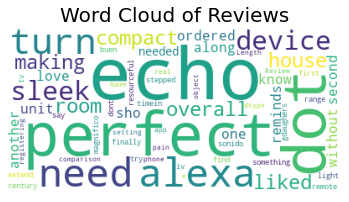

In [ ]:
wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS).generate(str(df['Review']))
plt.title('Word Cloud of Reviews', fontsize = 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()